# Stock Price Prediction using Echo State Networks

## Introduction

The Mackey-Glass system is essentially the differential equation, where we set the parameters to $\alpha = 0.2$, $\beta = 10$, $\gamma = 0.1$ and the time delay $\tau = 17$ in  order to have a mildly chaotic attractor. 

\begin{align}
\label{eq:MackeyGlass}
\dot{y}(t) = \alpha y(t-\tau) / (1 + y(t - \tau)^{\beta}) - \gamma y(t)
\end{align}

In [1]:
import numpy as np
from sklearn.metrics import mean_squared_error

from matplotlib import pyplot as plt
plt.rcParams['image.cmap'] = 'jet'
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42
%matplotlib inline

from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png', 'pdf')

from pyrcn.echo_state_network import ESNRegressor

Load the dataset

In [2]:
data = np.loadtxt("./dataset/MackeyGlass_t17.txt")

The first \num{500} samples are visualized.

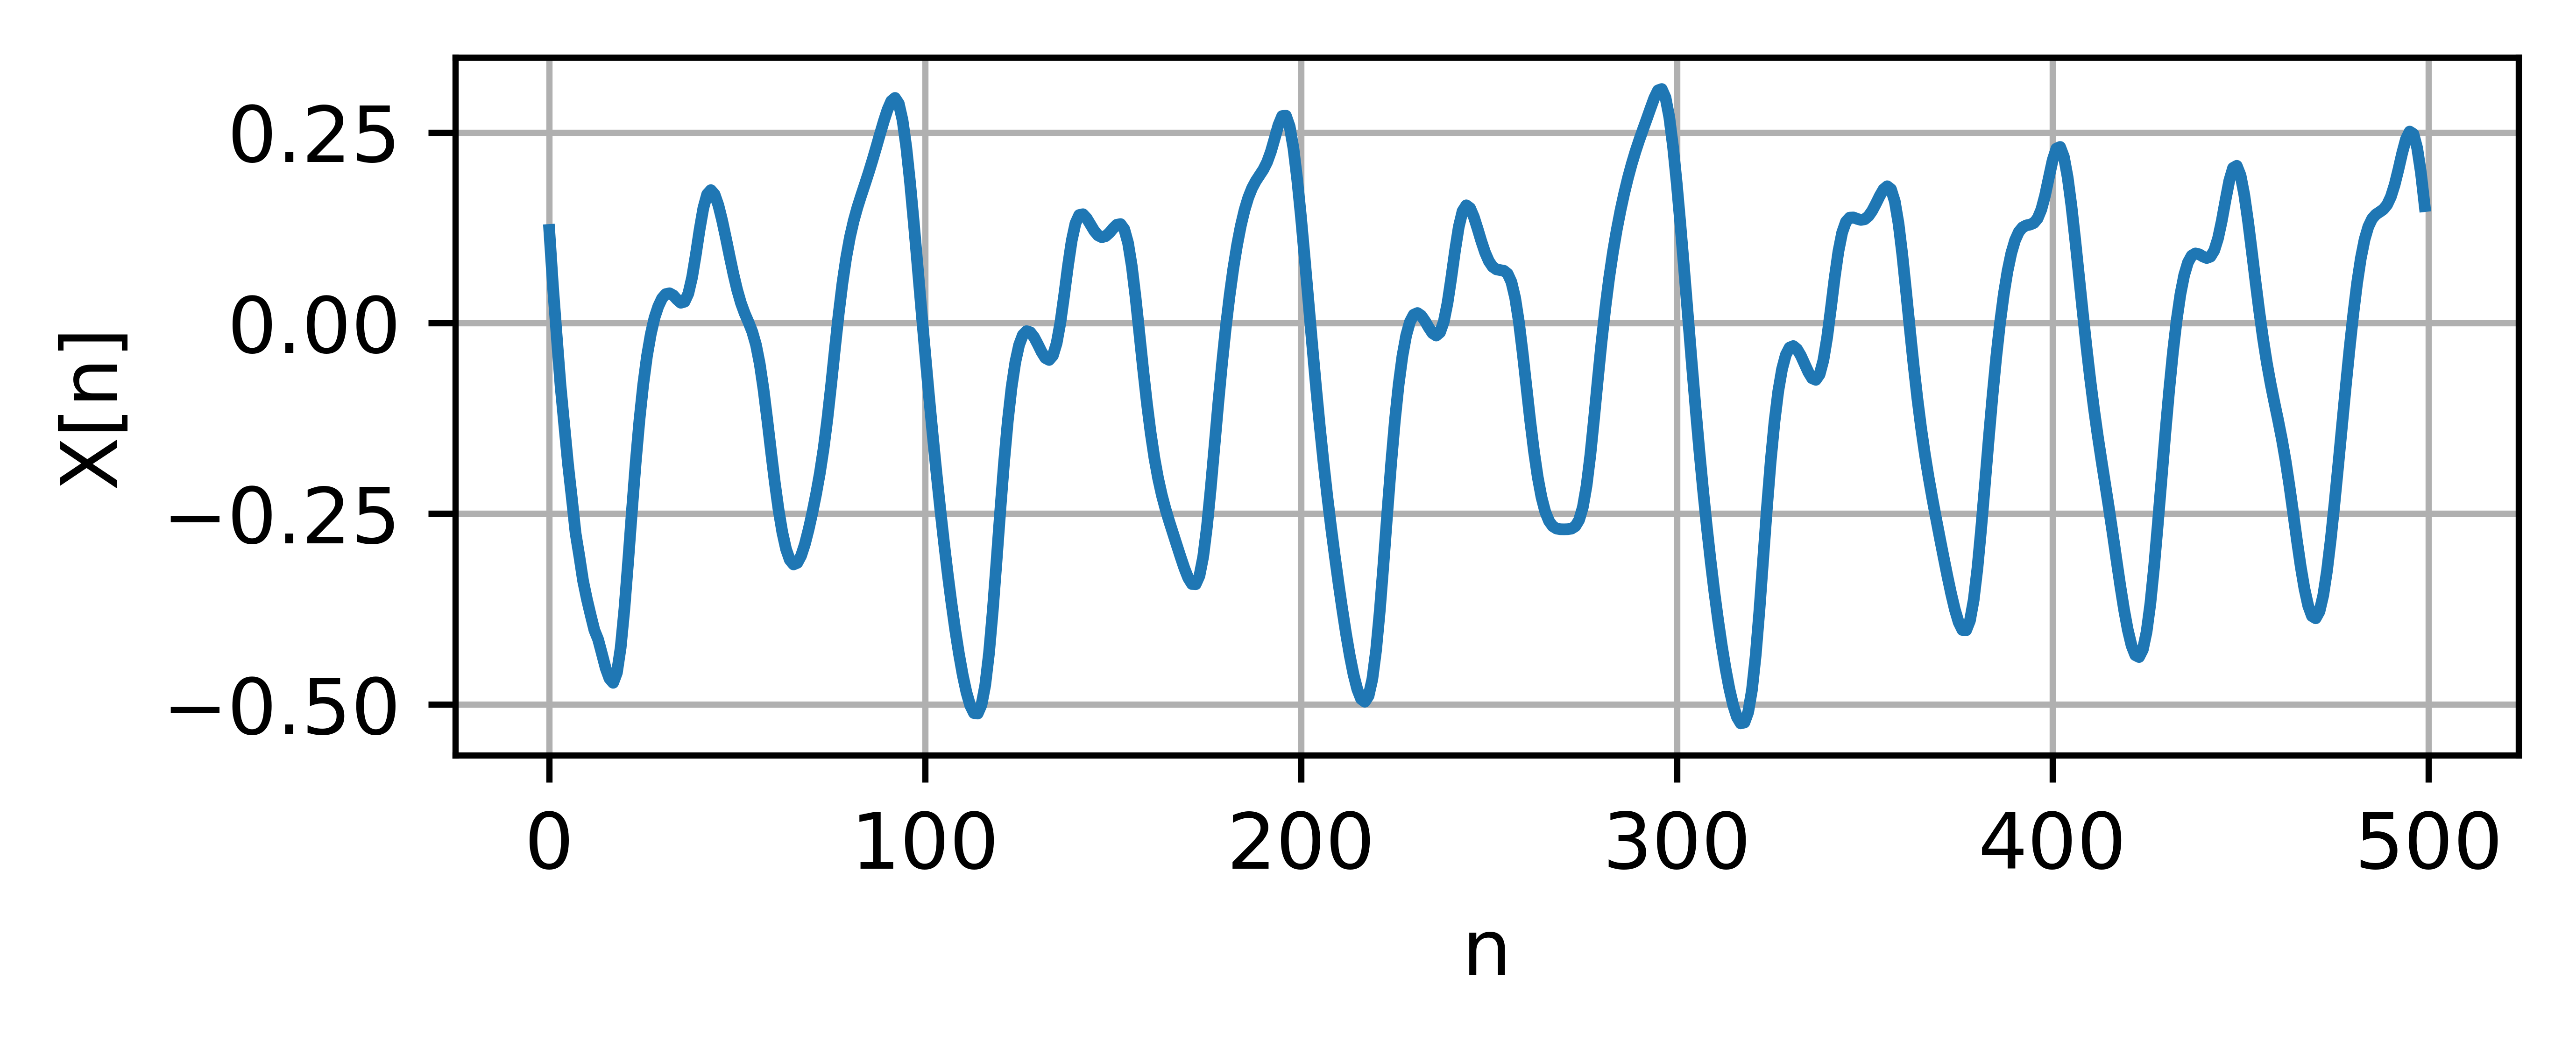

In [3]:
_, ax = plt.subplots(figsize=(4.75, 1.65), dpi=1200)
ax.plot(data[:500])
ax.set_xlabel("n")
ax.set_ylabel("X[n]")
plt.grid()

Standardization -> From here on, we have a numpy array!!!

In [4]:
data = data / (data.max() - data.min())

Define Train/Test lengths

In [5]:
initLen = 100 # number of time steps during which internal activations are washed-out during training
# we consider trainLen including the warming-up period (i.e. internal activations that are washed-out when training)
trainLen = initLen + 1900 # number of time steps during which we train the network
testLen = 2000 # number of time steps during which we test/run the network

Echo State Network preparation

In [6]:
esn = ESNRegressor(k_in=1, input_scaling=1.0, spectral_radius=1.2, bias=0.0, ext_bias=False, leakage=1.0,
                   reservoir_size=500, k_res=10, wash_out=0, reservoir_activation='tanh', bi_directional=False,
                   teacher_scaling=1., teacher_shift=0., solver='ridge', beta=1e-4, random_state=0)

Training and Prediction. Be careful, this can take a longer time!!!

The lowest MSE obtained with this settings were \num{5.97e-06} for the training set and \num{43.1e-06} for the test set.

In [7]:
train_in = data[None,0:trainLen]
train_out = data[None,0+1:trainLen+1]
test_in = data[None,trainLen:trainLen+testLen]
test_out = data[None,trainLen+1:trainLen+testLen+1]

train_in, train_out = train_in.T, train_out.T
test_in, test_out = test_in.T, test_out.T

esn.fit(X=train_in, y=train_out)
train_pred = esn.predict(X=train_in)
test_pred = esn.predict(X=test_in)

train_err = mean_squared_error(y_true=train_out, y_pred=train_pred)
test_err = mean_squared_error(y_true=test_out, y_pred=test_pred)

print("Train MSE:\t{0}".format(train_err))
print("Test MSE:\t{0}".format(test_err))

C:\Users\Steiner\AppData\Roaming\Python\Python37\site-packages\pyrcn-0.0.2-py3.7.egg\pyrcn\echo_state_network.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


Train MSE:	5.9565490400444104e-06
Test MSE:	4.3113749550908095e-05


Prediction of the training set.

Text(0, 0.5, 'X[n]')

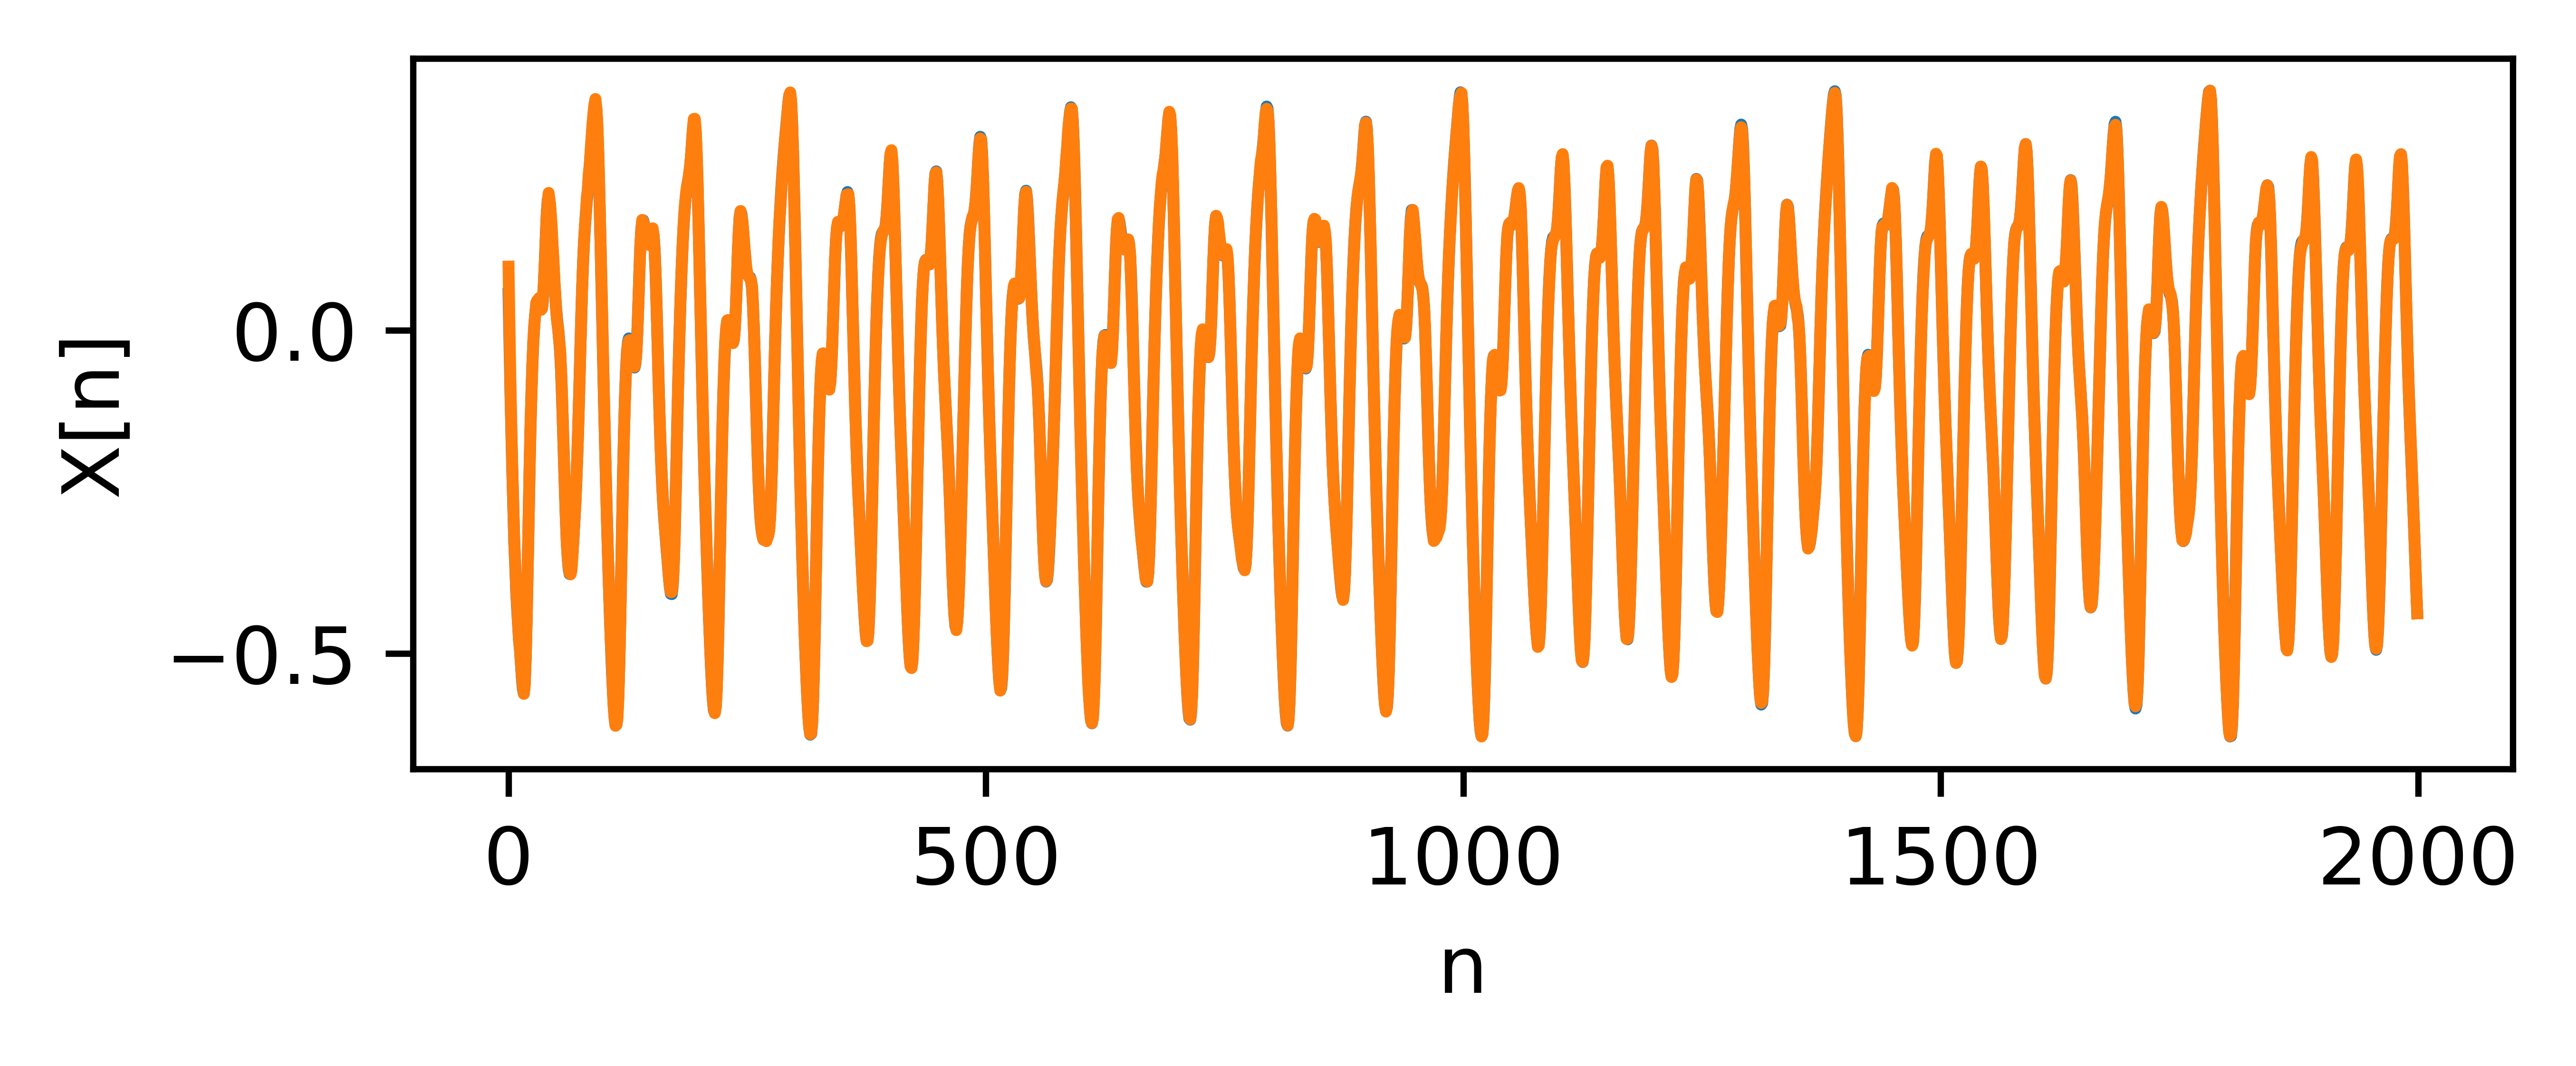

In [8]:
_, ax = plt.subplots(figsize=(4.75, 1.65), dpi=1200)
ax.plot(train_out)
ax.plot(train_pred)
ax.set_xlabel("n")
ax.set_ylabel("X[n]")

Prediction of the test set.


Text(0, 0.5, 'X[n]')

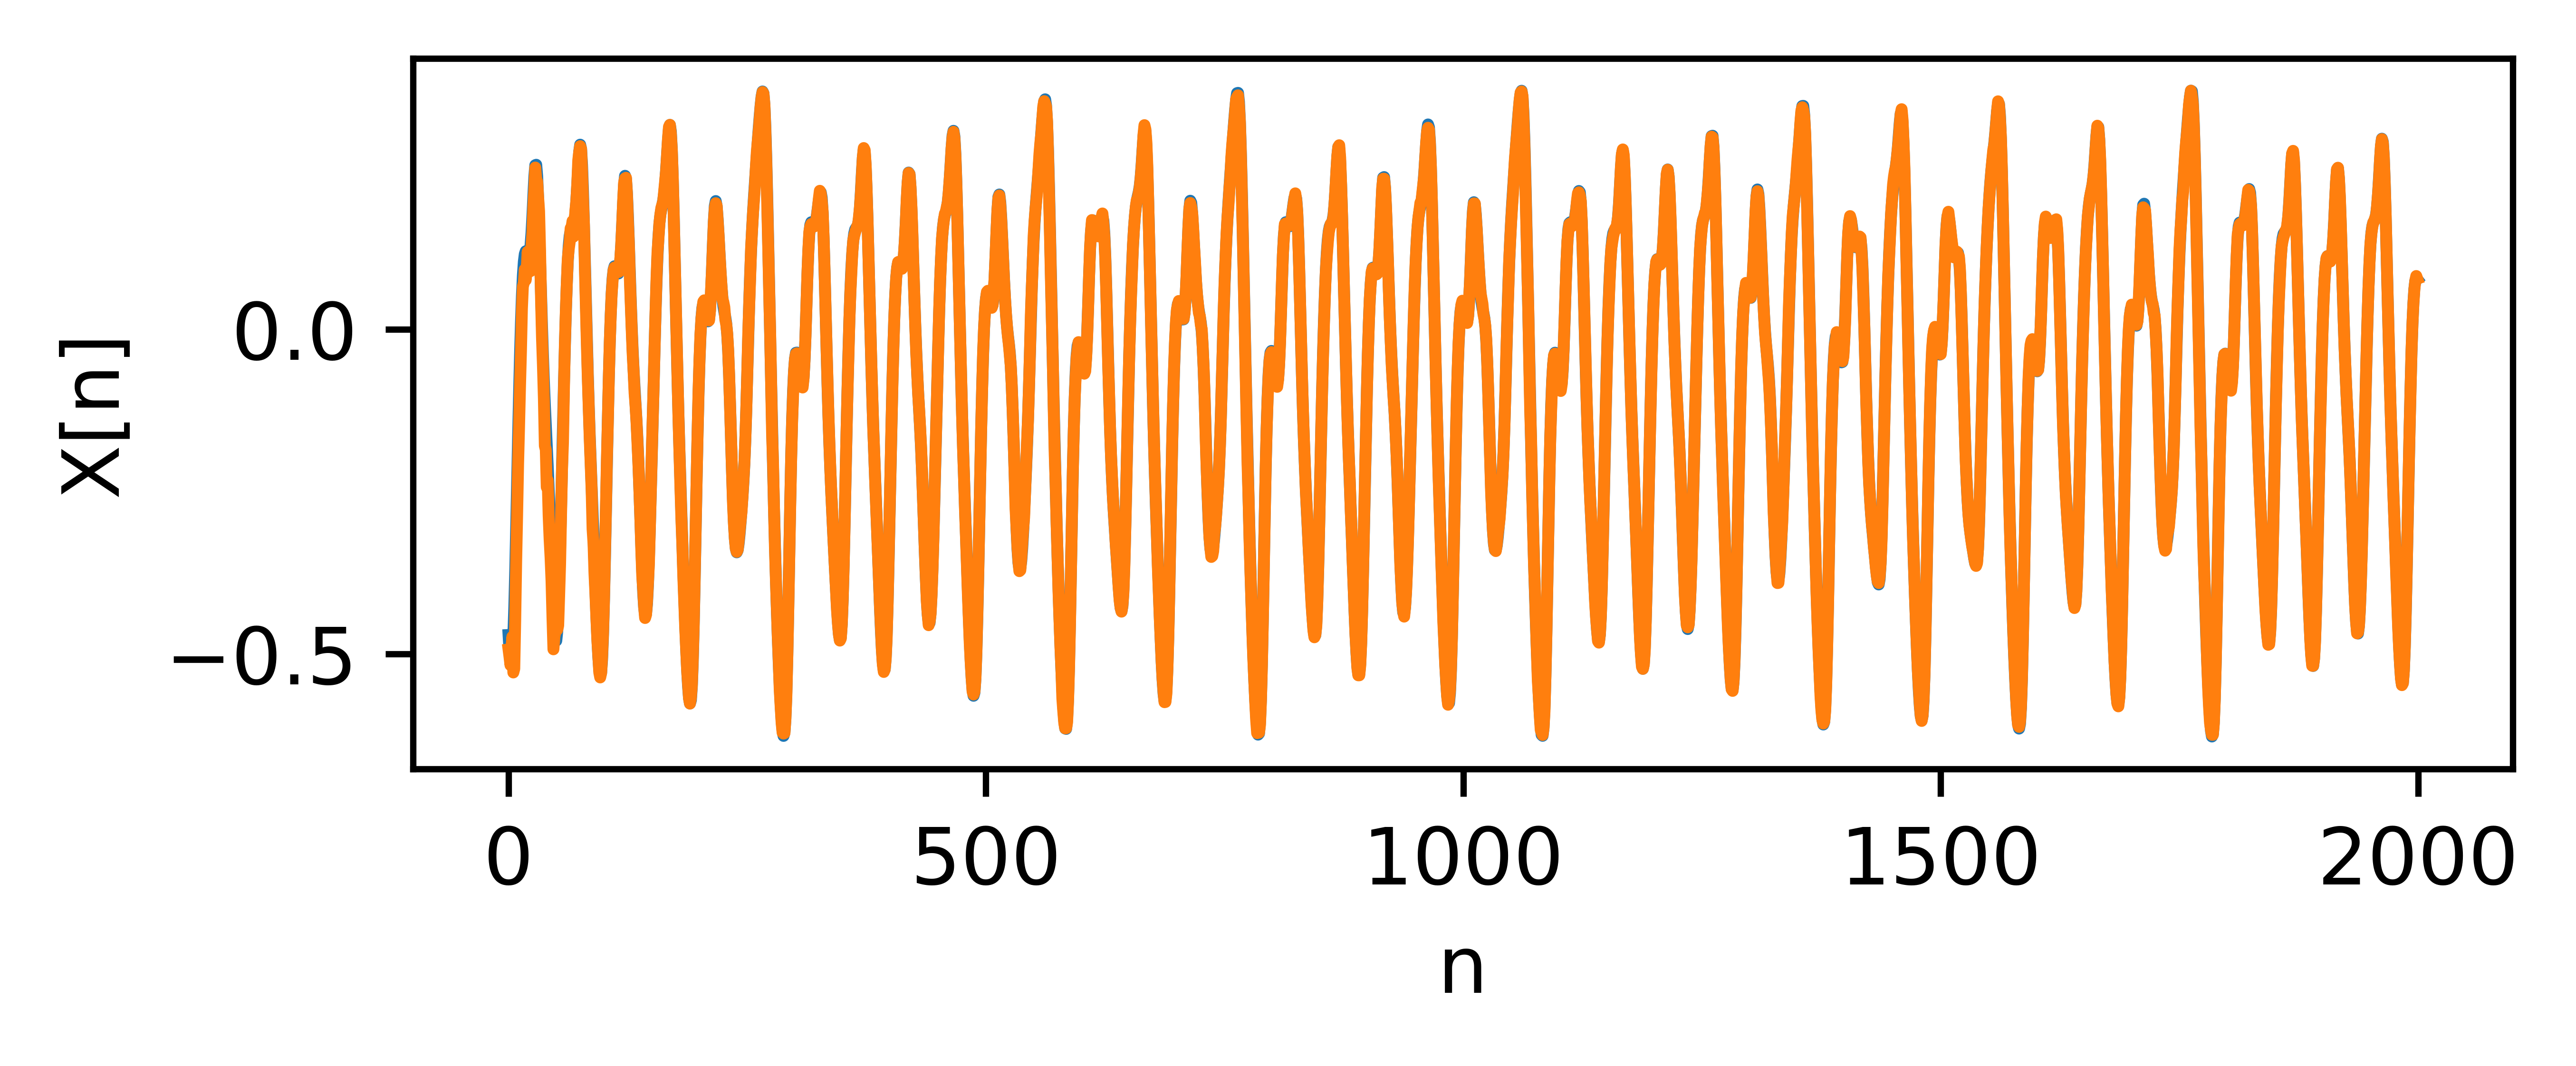

In [9]:
_, ax = plt.subplots(figsize=(4.75, 1.65), dpi=1200)
ax.plot(test_out)
ax.plot(test_pred)
ax.set_xlabel("n")
ax.set_ylabel("X[n]")